In [15]:

!pip install tensorflow numpy pandas matplotlib scikit-learn pillow

In [17]:
import zipfile
import os



In [19]:
import zipfile
import os

# # Path to the uploaded zip file
# zip_file_path = "C:/Users/User/Downloads/archive.zip"  # Update the path if necessary
extracted_dir = 'C:/Users/User/Downloads/traffic_signs'

# # Extract the zip file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extracted_dir)

# Verify extraction
for root, dirs, files in os.walk(extracted_dir):
    print(root, dirs, files)

C:/Users/User/Downloads/traffic_signs ['Meta', 'Test', 'Train'] ['Meta.csv', 'Test.csv', 'Train.csv']
C:/Users/User/Downloads/traffic_signs\Meta [] ['.~lock.ClassesInformation.ods#', '.~lock.ClassesInformationStrong.ods#', '0.png', '1.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '2.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '3.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '4.png', '40.png', '41.png', '42.png', '5.png', '6.png', '7.png', '8.png', '9.png']
C:/Users/User/Downloads/traffic_signs\Test [] ['00000.png', '00001.png', '00002.png', '00003.png', '00004.png', '00005.png', '00006.png', '00007.png', '00008.png', '00009.png', '00010.png', '00011.png', '00012.png', '00013.png', '00014.png', '00015.png', '00016.png', '00017.png', '00018.png', '00019.png', '00020.png', '00021.png', '00022.png', '00023.png'

In [21]:
# TensorFlow + Keras imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [23]:

# Image settings
height = 50
width = 50
batch_size = 4
seed = 42


In [27]:

# Data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_dataset = train_datagen.flow_from_directory('C:/Users/User/Downloads/traffic_signs/Train',
                                                  target_size=(height, width),
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='training')

val_dataset = train_datagen.flow_from_directory('C:/Users/User/Downloads/traffic_signs/Train',
                                                target_size=(height, width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')


Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [29]:

# Model creation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu', input_shape=(height, width, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Dense(43, activation='softmax')  # 43 classes
])


C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
# Training
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)


Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7842/7842 ━━━━━━━━━━━━━━━━━━━━ 733s 92ms/step - accuracy: 0.5886 - loss: 1.6043 - val_accuracy: 0.8731 - val_loss: 0.5509
Epoch 2/10
7842/7842 ━━━━━━━━━━━━━━━━━━━━ 445s 57ms/step - accuracy: 0.8808 - loss: 0.4125 - val_accuracy: 0.8790 - val_loss: 0.4731
Epoch 3/10
7842/7842 ━━━━━━━━━━━━━━━━━━━━ 362s 46ms/step - accuracy: 0.9211 - loss: 0.2855 - val_accuracy: 0.8961 - val_loss: 0.5543
Epoch 4/10
7842/7842 ━━━━━━━━━━━━━━━━━━━━ 349s 45ms/step - accuracy: 0.9304 - loss: 0.2484 - val_accuracy: 0.9607 - val_loss: 0.1670
Epoch 5/10
7842/7842 ━━━━━━━━━━━━━━━━━━━━ 344s 44ms/step - accuracy: 0.9455 - loss: 0.1926 - val_accuracy: 0.9430 - val_loss: 0.2097
Epoch 6/10
7842/7842 ━━━━━━━━━━━━━━━━━━━━ 346s 44ms/step - accuracy: 0.9458 - loss: 0.1854 - val_accuracy: 0.9555 - val_loss: 0.1858
Epoch 7/10
7842/7842 ━━━━━━━━━━━━━━━━━━━━ 352s 45ms/step - accuracy: 0.9553 - loss: 0.1537 - val_accuracy: 0.9552 - val_loss: 0.1778
Epoch 8/10
7842/7842 ━━━━━━━━━━━━━━━━━━━━ 369s 47ms/step - accuracy: 0.9566 - lo

In [37]:
# Save the model locally
model.save('local_model.h5')


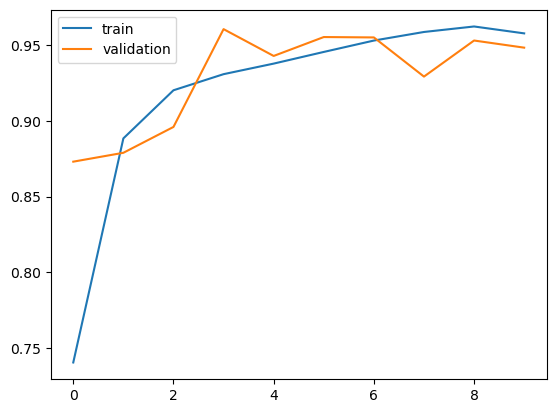

In [38]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [39]:
    # After training, we extract the weights
weights = model.get_weights()

In [40]:
# Convert the weights to a JSON serializable format (convert to list)
weights_serializable = [w.tolist() for w in weights]


In [48]:
!pip install requests
import requests

In [1]:
# Send the weights to the central server
url = 'http://<your_server>/upload_weights'
data = {'weights': weights_serializable}
response = requests.post(url, json=data)

NameError: name 'weights_serializable' is not defined

In [63]:
print(response.json())


{'message': 'Weights received successfully!', 'total_hits': 2}
